# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



In [630]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy import stats
#from google.colab import drive
from scipy.optimize import curve_fit
#conda install -c plotly plotly
#import plotly.express as px
import seaborn as sns
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import itertools
# Varios
# ==============================================================================
from tqdm import tqdm
from sklearn import metrics



In [470]:
#caeergamos los datos

drive.mount('/content/gdrive', force_remount=True)

# Aca deben apuntar a la carpeta de su drive donde guardaron los datos
root_dir = "/content/gdrive/My Drive/datos_acamica"


NameError: name 'drive' is not defined

In [471]:
#datos=pd.read_csv('/content/gdrive/My Drive/datos_acamica/datos_covid.csv')
datos=pd.read_csv('data/owid-covid-data.csv')
datos

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121534,ZWE,Africa,Zimbabwe,2021-10-01,131028.0,208.0,270.571,4624.0,1.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121535,ZWE,Africa,Zimbabwe,2021-10-02,131094.0,66.0,227.000,4625.0,1.0,3.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121536,ZWE,Africa,Zimbabwe,2021-10-03,131129.0,35.0,214.857,4627.0,2.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121537,ZWE,Africa,Zimbabwe,2021-10-04,131129.0,0.0,172.857,4627.0,0.0,2.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [472]:
datos2 = datos[['location','iso_code','date','total_tests','total_deaths','total_cases']]

In [473]:
#datos.info()

In [474]:
paises=datos2['location'] #cargo el vector de paises
confirmados=datos2['total_cases'] #carga vector todos los casos confirmados

Text(0, 0.5, 'cantidad de casos')

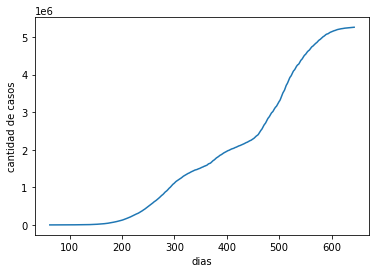

In [475]:
#seleccionamos Argentina
ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Observamos que en Argentina el primer caso de Covid no fue posterior al primer caso detectado en el mundo. Para determinar el día en que se detectó el primer caso en Arg primero vamos a filtrar por Pais, allí obtenemos los indices.

In [476]:
#paises[paises == 'Argentina']
#ind_arg[0]
ind_arg[:10]
# o podemos hacer esto
#np.where(paises=='Argentina')

array([4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338])

In [477]:
#confirmados[ind_arg]

In [478]:
#Transformamos a lista
lst = list(casos_arg)

In [479]:
# Buscamos el primer valor no nulo, sería el primer día con casos
##from numpy import nan
#casos_arg[np.isfinite(casos_arg)][0]
lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]

1.0

In [480]:
# Buscamos el indice del primer elemento no nulo
lst.index(next(filter(lambda x: not np.isnan(x), lst)))

62

In [481]:
## entonces el primer
casos_arg[62:][:5]

4391    1.0
4392    1.0
4393    1.0
4394    2.0
4395    8.0
Name: total_cases, dtype: float64

Una vez obtenido el primer elemento no nulo, es decir cuando ocurre el primer caso, podemos saber cual es la fecha a partir de indice obtenido.

In [482]:
# primer caso de covid en Argentina
datos2.loc[4391]

location         Argentina
iso_code               ARG
date            2020-03-03
total_tests          654.0
total_deaths           NaN
total_cases            1.0
Name: 4391, dtype: object

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0, 0.5, 'log cantidad de casos')

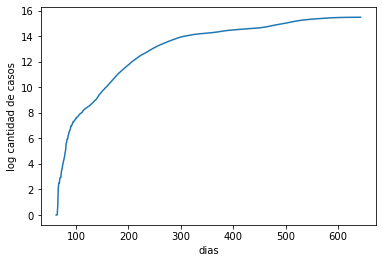

In [483]:
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa en los primeros 60 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

In [484]:
# comenzamos desde el indice 62 que es cuando se detectó el primer caso en Argentina. id 4391
casos_arg[62:122][:10]

4391     1.0
4392     1.0
4393     1.0
4394     2.0
4395     8.0
4396    12.0
4397    12.0
4398    17.0
4399    19.0
4400    19.0
Name: total_cases, dtype: float64

Text(0, 0.5, 'cantidad de casos')

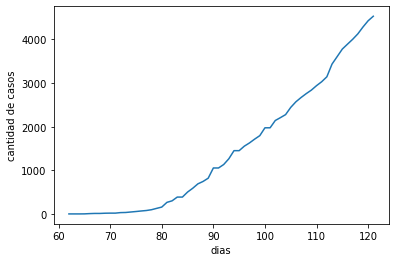

In [485]:
#Se filtra desde el primer día que hubo casos
casos_principio=casos_arg[62:122]
dias_principio=dias[62:122]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

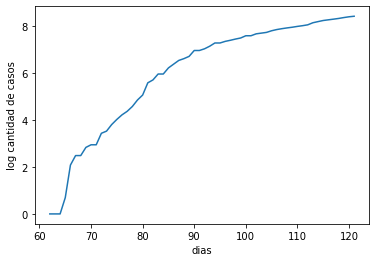

In [486]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Mejor nos quedamos con lo que sucede entre los días 31 y 55, ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos')

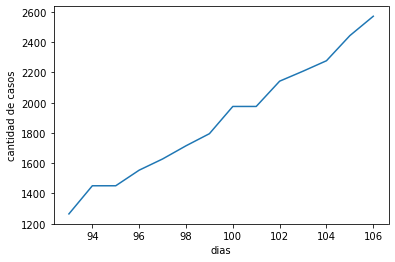

In [487]:
#casos_principio=casos_arg[31:55]
#dias_principio=dias[31:55]

casos_principio=casos_arg[93:107]
dias_principio=dias[93:107]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

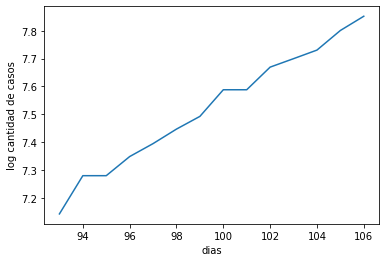

In [488]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [489]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [490]:
#ajustamos, popt[0] es nuestro "K" y popt[1] t0
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([  0.05065185, -49.02984924])

**popt :** Valores optimos para los parámetros, donde la suma del error cuadratico es minimizado. El primer elemento para nuestra función definida es el valor `k` y el segundo es `t0`

**pcov :** La covarianza estimada de popt. La diagonal provee la varianza del parametro estimado. Para computar el error, la desviación estandar de un parámetro hay usar perr = np.sqrt(np.diag(pcov)).

In [491]:
popt

array([  0.05065185, -49.02984924])

In [492]:
pcov

array([[1.94919125e-06, 5.77705715e-03],
       [5.77705715e-03, 1.71333636e+01]])

In [493]:
perr = np.sqrt(np.diag(pcov))
#float(perr)p
perr

array([1.39613439e-03, 4.13924674e+00])

In [494]:
#print("El intervalo de confianza para K es: {} - {}".format( round(perr[0],3), round(perr[1],3) ))

Veamos cómo se ajusta lo que obtuvimos a los datos reales

In [495]:
k=popt[0]
k

0.0506518543702892

In [496]:
t0=popt[1]
t0

-49.02984924379537

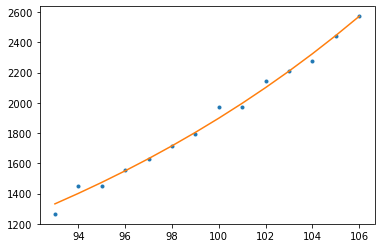

In [497]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

In [498]:
dias_principio

array([ 93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106])

In [499]:
casos_principio

4422    1265.0
4423    1451.0
4424    1451.0
4425    1554.0
4426    1628.0
4427    1715.0
4428    1795.0
4429    1975.0
4430    1975.0
4431    2142.0
4432    2208.0
4433    2277.0
4434    2443.0
4435    2571.0
Name: total_cases, dtype: float64

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [500]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

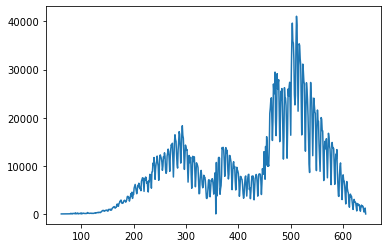

In [501]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)

Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para  𝑘  a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de  𝑘 . Luego compara el modelo con los datos mundiales.

In [502]:
## convertimos en dataframe para luego imputar los nan con pandas
casos_arg_df = pd.DataFrame(casos_arg)

In [503]:
# Imputamos los NaN con 0
casos_arg_df.fillna(0, inplace=True)

In [504]:
# Volvemos a convertir el dataframe a array
datos=np.array(casos_arg_df)
#datos

In [505]:
## Boostrapping
def remuestreo(datos):
  remuestra=np.zeros(len(datos))
  i=0
  while i<len(datos):
    remuestra[i]=datos[np.random.randint(len(datos))]
    i=i+1
    
  return remuestra  

In [506]:
N=200
muestra_mu=np.zeros(N)
muestra_sigma=np.zeros(N)

for i in range(N):
  datosr=remuestreo(datos)
  muestra_mu[i]=np.mean(datosr)
  muestra_sigma[i]=np.std(datos)

In [507]:
np.mean(muestra_mu)

1754505.538501553

In [508]:
np.mean(muestra_sigma)

1807702.5615202528

In [509]:
#intervalo de confianza para mu
mmu=np.mean(muestra_mu)
smu=np.std(muestra_mu)
z=1.96   # el p valor para un 95% 
int_conf=[mmu-z*smu/np.sqrt(N),mmu+z*smu/np.sqrt(N)]
print(int_conf)

[1743786.895267009, 1765224.181736097]


In [510]:
#intervalo de confianza para sigma
msd=np.mean(muestra_sigma)
ssd=np.std(muestra_sigma)
z=1.96
int_conf=[msd-z*ssd/np.sqrt(N),msd+z*ssd/np.sqrt(N)]
print(int_conf)

[1807702.5615202528, 1807702.5615202528]


#### Intervalo de convianza para curve_fit

https://stackoverflow.com/questions/39434402/how-to-get-confidence-intervals-from-curve-fit

In [511]:
np.sqrt(np.diagonal(pcov))

array([1.39613439e-03, 4.13924674e+00])

Datos: Locations paises- Generar una función que filtre los paises y muestre cuando fue la aparición del primer caso

In [512]:
#datos[datos.location == list_paises]
#datos[datos["location"].isin([list_paises])]
list(paises.unique())

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


En Argentina el/los primer/primeros 1.0 casos fue el día 2020-04-26 indice 62
En Brazil el/los primer/primeros 1.0 casos fue el día 2020-02-24 indice 0
En Chile el/los primer/primeros 2.0 casos fue el día 2020-02-24 indice 0
En Colombia el/los primer/primeros 1.0 casos fue el día 2020-02-24 indice 0
En France el/los primer/primeros 2.0 casos fue el día 2020-02-24 indice 0
En Germany el/los primer/primeros 1.0 casos fue el día 2020-02-27 indice 3
En Russia el/los primer/primeros 2.0 casos fue el día 2020-02-24 indice 0
En Spain el/los primer/primeros 1.0 casos fue el día 2020-02-24 indice 0
En United Kingdom el/los primer/primeros 2.0 casos fue el día 2020-02-24 indice 0
En United States el/los primer/primeros 1.0 casos fue el día 2020-02-24 indice 0
En India el/los primer/primeros 1.0 casos fue el día 2020-02-24 indice 0
En China el/los primer/primeros 548.0 casos fue el día 2020-02-24 indice 0


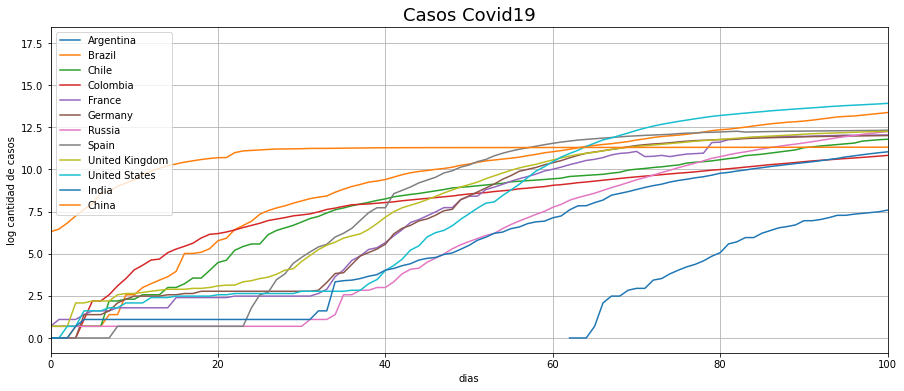

In [513]:
## Inicio de analisis, solo para pruebas, quitar

lista_paises = ['Argentina','Brazil','Chile','Colombia','France','Germany','Russia','Spain','United Kingdom','United States','India','China']
#lista_paises = ['Argentina','Brazil','Chile','Colombia']

#armamos la figura para el gráfico
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title('Casos Covid19',fontsize=18, loc='center')
ax.set_xlim([0, 100])
ax.grid()

for x_pais in lista_paises:
    #seleccionamos Argentina
    ind_xpais=np.where(paises==x_pais)
    ind_xpais=ind_xpais[0]
    
    casos_xpais=confirmados[ind_xpais]
    #Transformamos a lista
    lst = list(casos_xpais)
    # Buscamos el primer valor no nulo, sería el primer día con casos
    ##from numpy import nan
    #casos_arg[np.isfinite(casos_arg)][0]
    primer_caso=lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]
    # Buscamos el indice del primer elemento no nulo
    ind_x = lst.index(next(filter(lambda x: not np.isnan(x), lst)))
    # primer caso de covid en Argentina
    dia_start = datos2.date.loc[ind_x]
    print("En {} el/los primer/primeros {} casos fue el día {} indice {}".format(x_pais,primer_caso, dia_start, ind_x))
    
    ## Graficamos
    #fig, ax = plt.subplots(figsize=(8,3))
    dias=np.arange(0,len(casos_xpais))
    #ax.set_xticklabels(models, rotation=0)    
    fig = plt.plot(dias,np.log(casos_xpais),label=x_pais)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')
    #ax.set_xticklabels(models, rotation=0)
    ax.legend()


2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para  𝑘  a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de  𝑘 . Luego compara el modelo con los datos mundiales.

In [514]:
#lista vacia para guardar los mejores valores de k obtenidos para cada modelo según el país.
lista_k = []
lista_t0 = []


#definimos función para ajustar modelo
def exponencial(t,k,t0):
    C=np.exp(k*(t-t0))
    return C


def calcular_k(lista_paises):
    '''
    Función para calcular el valor de k.
    
    Parameters
    ----------
    lista_paises : lista con los nombres de los 
        paises a evaluar.
         
    Returns
    -------
    valor k: lista
        con valor de k.
    '''
    
    #armamos la figura para el gráfico
    #fig, ax = plt.subplots(figsize=(15,6))
    fig, axes = plt.subplots(2, figsize=(15, 12))
    fig.suptitle('Casos Covid19', fontsize=20)
    fig.tight_layout(pad=4.0)

    axes[0].set_title('Casos Covid19 Logaritmico',fontsize=14, loc='center')
    axes[0].set_xlim([0, 80])
    axes[0].grid()

    axes[1].set_title('Casos Covid19 Simulados',fontsize=14, loc='center')
    axes[1].set_xlim([0, 80])
    axes[1].grid()

    #color lineas gráfico
    marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))


    for x_pais in lista_paises:
        #seleccionamos Pais
        ind_xpais=np.where(paises==x_pais)
        ind_xpais=ind_xpais[0]
    
        casos_xpais=confirmados[ind_xpais]
        dias=np.arange(0,len(casos_xpais))
        #Imputamos los nan con 0
        #casos_xpais.fillna(0, inplace=True)
    
    
        #Transformamos a lista
        lst = list(casos_xpais)
        # Buscamos el primer valor no nulo, sería el primer día con casos
        ##from numpy import nan
        #casos_arg[np.isfinite(casos_arg)][0]
        primer_caso=lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]
        # Buscamos el indice del primer elemento no nulo
        ind_x = lst.index(next(filter(lambda x: not np.isnan(x), lst)))
        # primer caso de covid en Argentina
        dia_start = datos2.date.loc[ind_x]
        print("En {} el/los primer/primeros {} casos fue el día {} indice {}".format(x_pais,primer_caso, dia_start, ind_x))
    
        ## Graficamos
        #fig, ax = plt.subplots(figsize=(8,3))
        dias=np.arange(0,len(casos_xpais))
        #ax.set_xticklabels(models, rotation=0)    
        axes[0].plot(dias,np.log(casos_xpais),label=x_pais)
        axes[0].set_xlabel('dias')
        axes[0].set_ylabel('log cantidad de casos')
        #ax.set_xticklabels(models, rotation=0)
        axes[0].legend()
    
        ################# Estimamos K

        ind_inicio = ind_x
        ind_final = ind_inicio + 60
        
        #dias=np.arange(0,len(casos_arg))

    
        print("{} ind_inicio {}  ind_final {}".format(x_pais,ind_inicio,ind_final))
        casos_principio=casos_xpais[ind_inicio:ind_final]
        dias_principio=dias[ind_inicio:ind_final]
        print(list(dias_principio))    
        print(list(casos_principio))


        #ajustamos, popt[0] es nuestro "K" y popt[1] t0
        popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
        #popt
    
        #Guardamos el valor de k y t0 en la lista:
        lista_k.append(popt[0])
        lista_t0.append(popt[1])

        # Ajustamos los datos con los valores de los parámetros obtenidos
        k=popt[0]
        t0=popt[1]
        print("PARAMETRO K: ",k)    
        print("PARAMETRO t0: ",t0)
        print(dias_principio.size)
        print(casos_principio.size)
        casos_simu=exponencial(dias_principio,k,t0)
        ## Graficamos las simulaciones
    
        #color de la lineas
        color = next(ax._get_lines.prop_cycler)['color']

        axes[1].plot(dias_principio,casos_principio,'.', color=color)
        axes[1].plot(dias_principio,casos_simu,label=x_pais, color = color)
        axes[1].set_xlabel('dias')
        axes[1].set_ylabel('cantidad de casos')
        axes[1].legend()
        
    return lista_k
      

In [515]:
# lista de paises a evaluar, elegimos inicialmente 10 paices del emisferio Norte
#lista_paises = ['Denmark','Italy','Israel','Portugal','France','Germany','Russia','Spain','United Kingdom','United States','India','China']
lista_paises = ['Denmark','Italy','Israel','Portugal','France','Germany','Russia','Spain','United Kingdom','United States','India','Sweden']

#lista_paises = ['Argentina','Brazil','Chile','Colombia']
#lista_paises = ['France','Germany','Italy']

En Denmark el/los primer/primeros 1.0 casos fue el día 2020-03-20 indice 25
Denmark ind_inicio 25  ind_final 85
[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
[1.0, 1.0, 3.0, 4.0, 4.0, 6.0, 11.0, 11.0, 24.0, 24.0, 37.0, 92.0, 264.0, 444.0, 617.0, 804.0, 836.0, 875.0, 933.0, 1025.0, 1116.0, 1225.0, 1337.0, 1420.0, 1514.0, 1572.0, 1718.0, 1862.0, 2023.0, 2200.0, 2366.0, 2564.0, 2755.0, 3039.0, 3290.0, 3573.0, 3946.0, 4269.0, 4561.0, 4875.0, 5266.0, 5597.0, 5830.0, 6014.0, 6191.0, 6369.0, 6513.0, 6706.0, 6876.0, 7074.0, 7268.0, 7437.0, 7580.0, 7711.0, 7891.0, 8108.0, 8271.0, 8408.0, 8643.0, 8773.0]
PARAMETRO K:  0.04753202831056988
PARAMETRO t0:  -110.40708183152111
60
60
En Italy el/los primer/primeros 2.0 casos fue el día 2020-02-24 indice 0
Italy ind_inicio 0  ind_final 60
[0, 1, 2, 3, 4, 5, 6, 

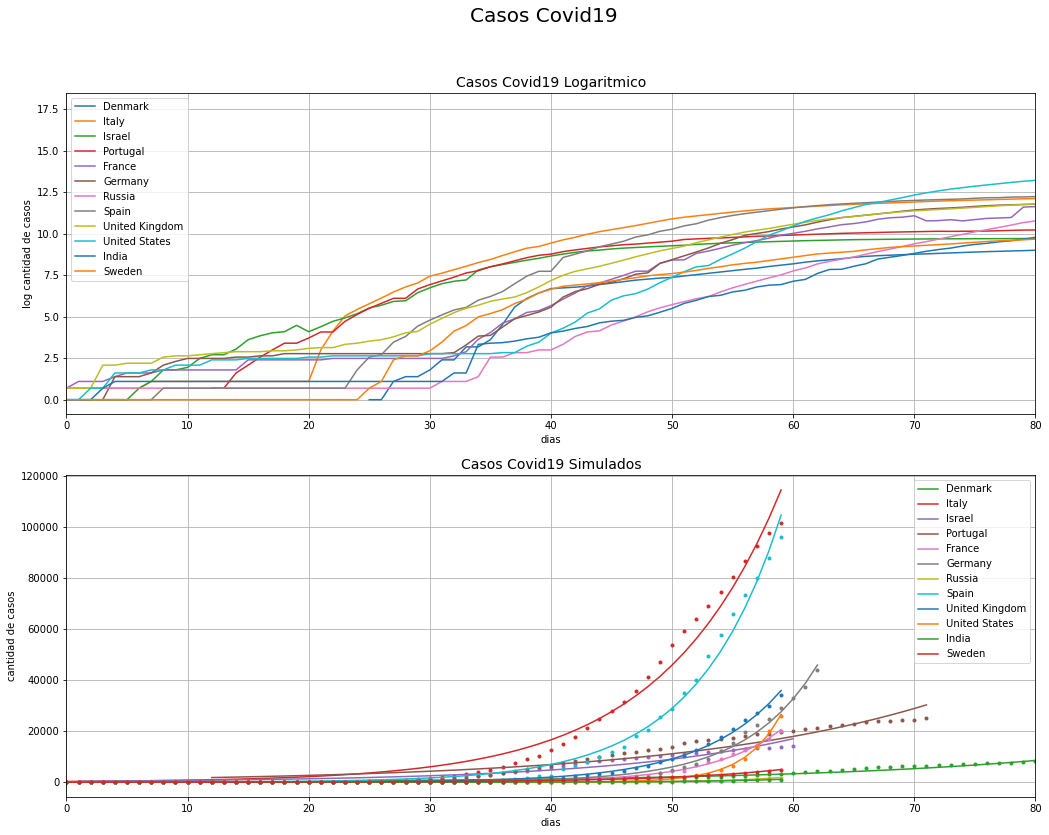

In [516]:
lista_k = calcular_k(lista_paises)

Graficamos la distribución de K para los módelos obenidos anteriormente para cada pais.

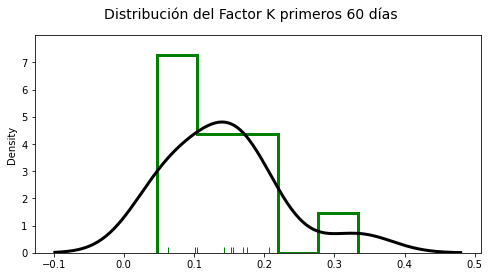

In [517]:
fig, axes = plt.subplots(1, figsize=(8,4))
fig.suptitle('Distribución del Factor K primeros 60 días', fontsize=14)
ax = sns.distplot(lista_k, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [518]:
#lista_k

### Intervalo de confianza basado en percentiles
Mediante bootstrapping, se simula la variabilidad esperada en el estadístico, en este caso la media, debido únicamente al muestreo aleatorio.

In [519]:
def calcular_estadistico(x):
    '''
    Función para calcular el estadístico de interés.
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    estadistico = np.mean(x)
    
    return(estadistico)


def bootstraping(x, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular el valor del estadístico en múltiples muestras generadas
    mediante muestreo repetido con reposición (bootstrapping).
    
    Parameters
    ----------
    x : numpy array 
        valores de la muestra.
 
    fun_estadistico : funcion
        función que recibe como argumento una muestra y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número iteraciones (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        valor del estadístico en cada muestra de bootstrapping.
    '''
    
    n = len(x)
    #Return a new array of given shape and type, filled with fill_value. Array con con shape 9999 y todos los valores en nan
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
        
    return dist_boot

Calcular el estadístico, en este caso la media

In [520]:
# converting list to array
datos = np.array(lista_k)

In [521]:
dist_boot = bootstraping(
                x = datos,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:00<00:00, 18870.22it/s]


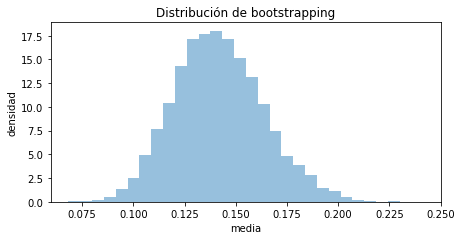

In [522]:
# Distribución de bootstrapping
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.set_title('Distribución de bootstrapping')
ax.set_xlabel('media')
ax.set_ylabel('densidad');

La dispersión de la distribución obtenida por bootstrapping es una aproximación del error estándar esperado debido a proceso de muestreo. Por esta razón, pueden emplearse sus percentiles para calcular intervalos de confianza. 

Ahora generemos el intervalo de confianza.  Primero hay que elegir $\alpha$, el error que estamos dispuestas/os a cometer. En este caso tomaremos $\alpha=0.05$, que implica que toleraremos hasta un 5% de error.

Una vez establecido alpha, podemos armar el intervalo de confianza para saber con un 95% un intervalo donde se encuentra el promedio $\mu$ de toda la población, usando una submuestra de esta. 

In [523]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles = np.quantile(a = dist_boot, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo de confianza de K basado en percentiles')
print('-------------------------------')
print(cuantiles)

-------------------------------
Intervalo de confianza de K basado en percentiles
-------------------------------
[0.10237218 0.18778776]


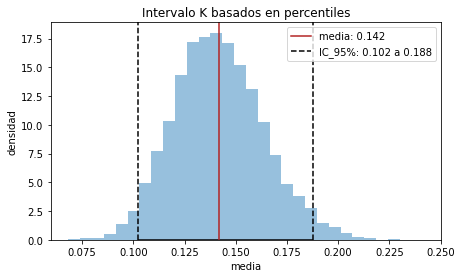

In [524]:
# Gráfico intervalo de confianza del 95% para K, aceptando un error de 5%
# ==============================================================================
media_obs = datos.mean()
media_obs = "{:.3f}".format(datos.mean())
media_obs = "media: " + media_obs

int_obs_izq = list(cuantiles)
int_obs_izq = "{:.3f}".format(cuantiles[0])
int_obs_der = "{:.3f}".format(cuantiles[1])

IC_95 = "IC_95%: " + int_obs_izq +" a "+ int_obs_der

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
#ax.axvline(x=datos.mean(), color='firebrick', label='media observada')
ax.axvline(x=datos.mean(), color='firebrick', label=media_obs)

#ax.axvline(x=cuantiles[0], color='black', linestyle='--', label=IC 95%)
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label=IC_95)
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.set_title('Intervalo K basados en percentiles')
ax.set_xlabel('media')
ax.set_ylabel('densidad')
ax.legend();

Redifinimos la función exponencial con los parámetros obtenidos de K y t0, luego probamos con datos reales de otros países

In [525]:
k=np.median(lista_k)
t0=np.median(lista_t0)
print(k)
print(t0)

0.14758255878445903
-15.88866847434106


In [526]:
#definimos función para ajustar modelo
def exponencial_new(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [572]:
# Definimos la función para predecir la curva de contagios para x pais según el valor de k obtenido.

#def predecir(lista_paises,k,t0):
def predecir(x_pais,k,t0):
    '''
    Función para calcular el valor de k.
    
    Parameters
    ----------
    lista_paises : lista con los nombres de los 
        paises a evaluar.
         
    Returns
    -------
    valor k: lista
        con valor de k.
    '''
    
    #armamos la figura para el gráfico
    #fig, ax = plt.subplots(figsize=(15,6))
    fig, axes = plt.subplots(1, figsize=(15, 8))
    fig.suptitle('Casos Covid19', fontsize=20)
    fig.tight_layout(pad=4.0)

    #axes[0].set_title('Casos Covid19 Logaritmico',fontsize=14, loc='center')
    #axes[0].set_xlim([0, 80])
    #axes[0].grid()

    axes.set_title('Casos Covid19 Simulados {}'.format(x_pais),fontsize=14, loc='center')
    axes.set_xlim([0, 80])
    axes.grid()

    #color lineas gráfico
    marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))


#    for x_pais in lista_paises:
    #seleccionamos Pais
    print("Pais seleccionado: {}".format(x_pais))
    ind_xpais=np.where(paises==x_pais)
    ind_xpais=ind_xpais[0]
    
    casos_xpais=confirmados[ind_xpais]
    dias=np.arange(0,len(casos_xpais))
    #Imputamos los nan con 0
    #casos_xpais.fillna(0, inplace=True)
    
    
    #Transformamos a lista
    lst = list(casos_xpais)
    # Buscamos el primer valor no nulo, sería el primer día con casos
    ##from numpy import nan
    #casos_arg[np.isfinite(casos_arg)][0]
    primer_caso=lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]
    # Buscamos el indice del primer elemento no nulo
    ind_x = lst.index(next(filter(lambda x: not np.isnan(x), lst)))
    # primer caso de covid en Pais_X
    dia_start = datos2.date.loc[ind_x]
    print("En {} el/los primer/primeros {} casos fue el día {} indice {}".format(x_pais,primer_caso, dia_start, ind_x))
    
    ## Graficamos
    #fig, ax = plt.subplots(figsize=(8,3))
    dias=np.arange(0,len(casos_xpais))
    ############### indices inicio y final
    ind_inicio = ind_x
    #ind_inicio = 0
    ind_final = ind_inicio + 60
    #ind_final = ind_inicio 
        
    #ax.set_xticklabels(models, rotation=0)    
    #axes[0].plot(dias,np.log(casos_xpais),label=x_pais)
        #axes[0].set_xlabel('dias')
        #axes[0].set_ylabel('log cantidad de casos reales')
        ##ax.set_xticklabels(models, rotation=0)
        #axes[0].legend()
        #axes[0].set_xlim(ind_inicio,ind_final)
        
        ################# Estimamos K

    dias_x=np.arange(ind_x,ind_final)
    #dias_x=np.arange(0,60)

    print("----dias_x para simulacion-----")
    print(list(dias_x))
    #print("{} ind_inicio {}  ind_final {}".format(x_pais,ind_inicio,ind_final))
    casos_principio=casos_xpais[ind_inicio:ind_final]
    dias_principio=dias[ind_inicio:ind_final]
    print("----dias_principio casos reales------")
    print(list(dias_principio)) 
    print("------casos_principio reales-----")
    print(list(casos_principio.astype(int)))

    #ajustamos, popt[0] es nuestro "K" y popt[1] t0
    #popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
    #popt
    
    #Guardamos el valor de k en la lista:
    #lista_k.append(popt[0])

    # Ajustamos los datos con los valores de los parámetros obtenidos
    #k=popt[0]
    #t0=popt[1]
    print("PARAMETRO K: ",k)    
    print("PARAMETRO t0: ",t0)
    #print(dias_principio.size)
    #print(casos_principio.size)
    #print(dias_x.size)
    casos_simu=exponencial_new(dias_x,k,t0)
    #print(casos_simu.size)
    print("-----casos_simu------")
    print(list(casos_simu.astype(np.int)))
   
    ## Graficamos las simulaciones
    label_simu=x_pais + " simulados"
    label_real=x_pais + " reales"

    #color de la lineas
    color = next(ax._get_lines.prop_cycler)['color']
    axes.plot(dias_principio,casos_principio,label=label_real, color=color)
    axes.plot(dias_x,casos_simu,'.',label=label_simu, color = color)
    #axes.set_xlabel('das')
    #axes.set_ylabel('cantidad de casos')
    axes.legend()
    plt.xlim([ind_inicio,ind_final])
        
    return list(casos_principio)
      

In [573]:
np.exp(0.147*(62-60))

1.3417839036669714

Pais seleccionado: Argentina
En Argentina el/los primer/primeros 1.0 casos fue el día 2020-04-26 indice 62
----dias_x para simulacion-----
[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
----dias_principio casos reales------
[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
------casos_principio reales-----
[1, 1, 1, 2, 8, 12, 12, 17, 19, 19, 31, 34, 45, 56, 68, 79, 97, 128, 158, 266, 301, 387, 387, 502, 589, 690, 745, 820, 1054, 1054, 1133, 1265, 1451, 1451, 1554, 1628, 1715, 1795, 1975, 1975, 2142, 2208, 2277, 2443, 2571, 2669, 2758, 2839, 2941, 3031, 3144, 3435, 

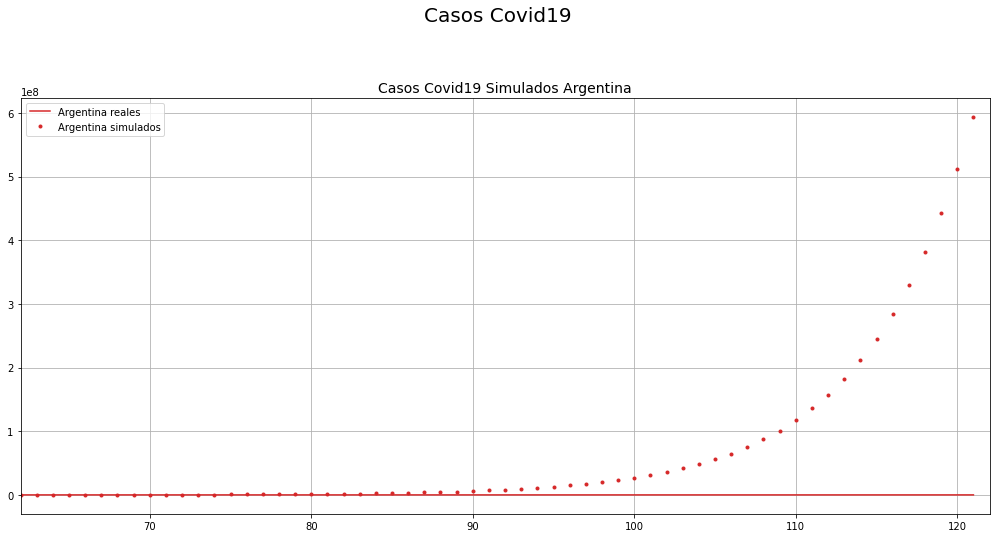

In [574]:
lista_paises = 'Argentina'
#lista_paises = 'Brazil'
casos_principio = predecir(lista_paises,k,t0)
#casos_principio

Pais seleccionado: Argentina
En Argentina el/los primer/primeros 1.0 casos fue el día 2020-04-26 indice 62
----dias_x para simulacion-----
[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
----dias_principio casos reales------
[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
------casos_principio reales-----
[1, 1, 1, 2, 8, 12, 12, 17, 19, 19, 31, 34, 45, 56, 68, 79, 97, 128, 158, 266, 301, 387, 387, 502, 589, 690, 745, 820, 1054, 1054, 1133, 1265, 1451, 1451, 1554, 1628, 1715, 1795, 1975, 1975, 2142, 2208, 2277, 2443, 2571, 2669, 2758, 2839, 2941, 3031, 3144, 3435, 

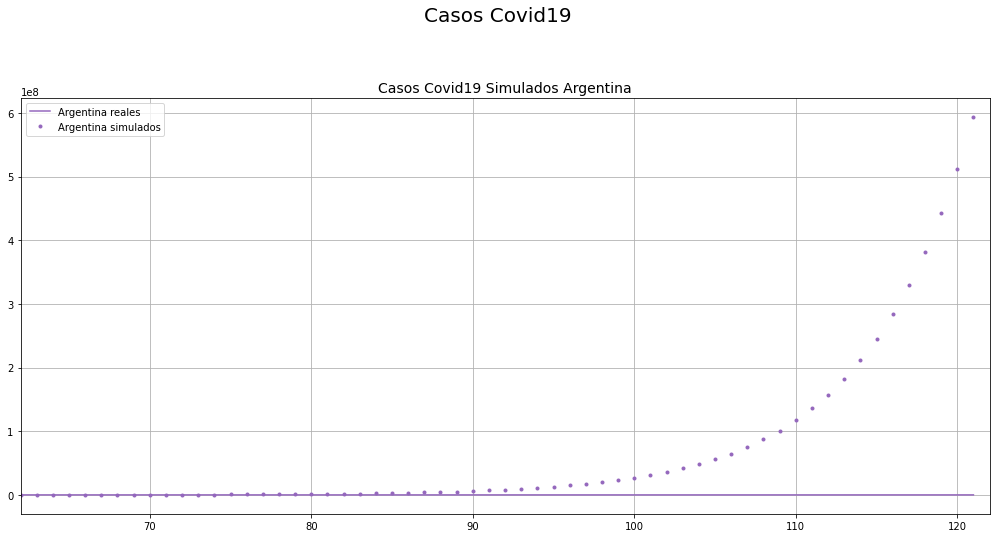

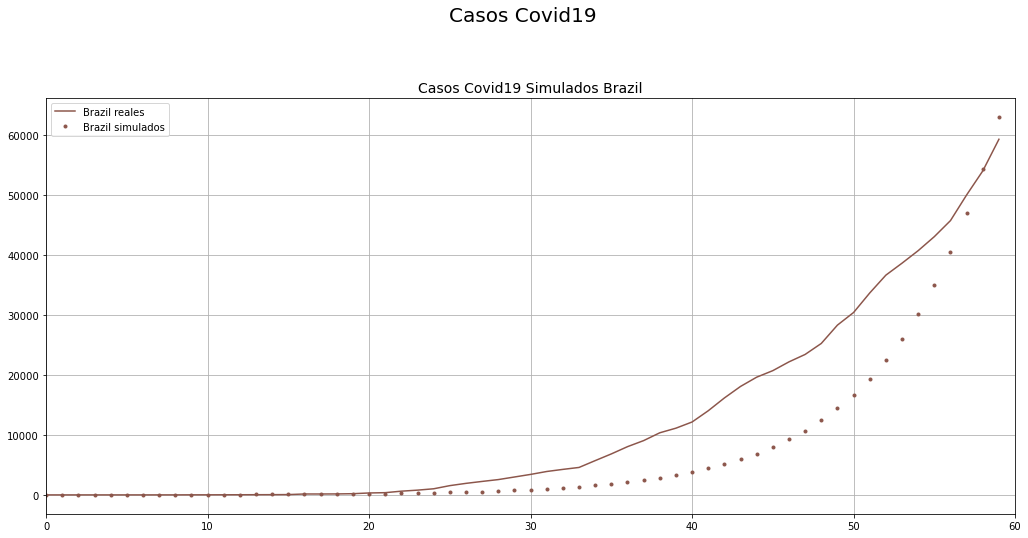

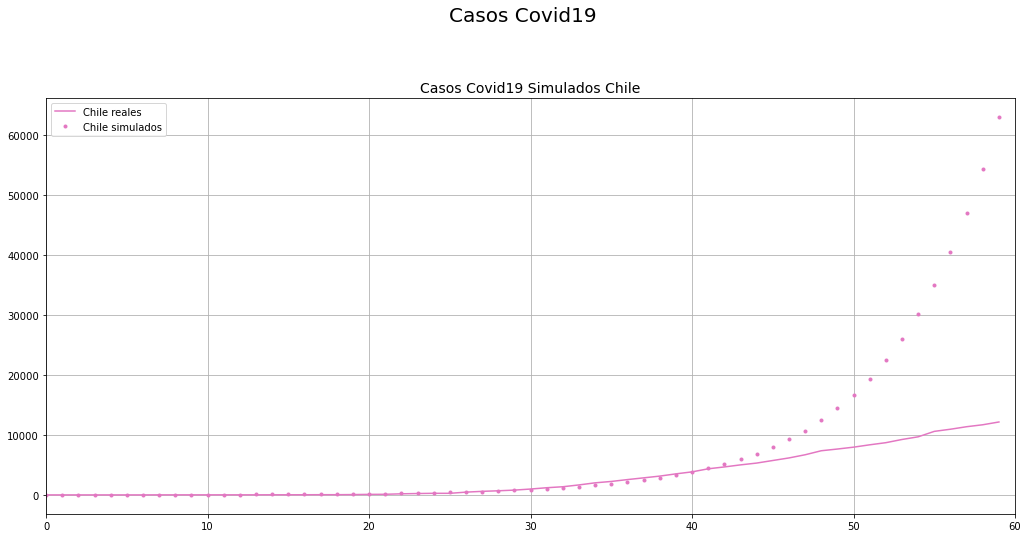

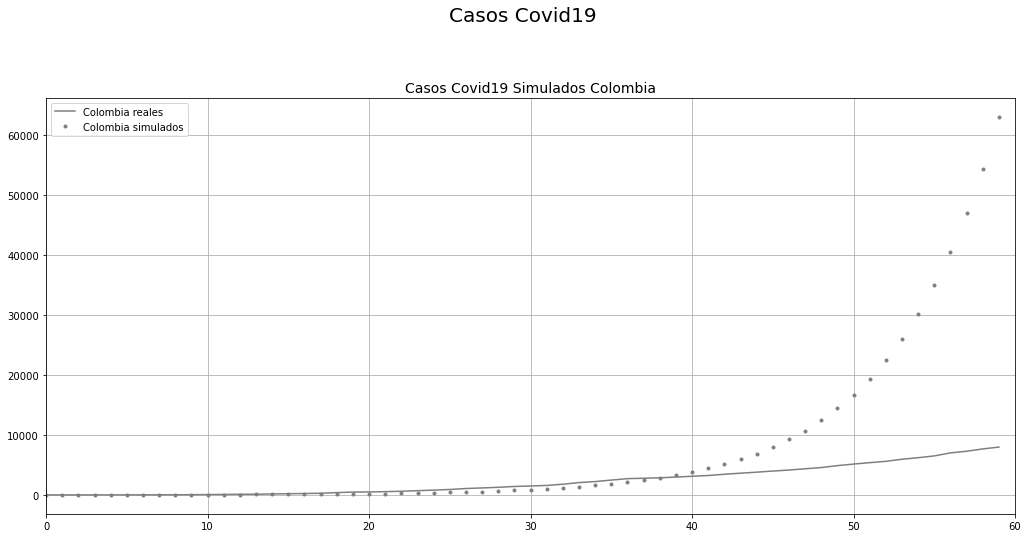

In [575]:
lista_paises = ['Argentina','Brazil','Chile','Colombia']
for lista in lista_paises:
    casos_principio = predecir(lista,k,t0)
    print(lista)

##### 

Aquí se obserca como se despega la curva de contagíos predicha con la real utilizando el modelo entrenado con datos de los paises donde comenzó la epidemia. 

Con los paises elegidos para entrenar nuestro modelo (obtener los parámetros k y t0) el primer caso de Covid fue detectado el 22 de Febrero.

- Argentina: se detectó el primer caso el 2020-04-26, es decir 62 días después de detectado el primer caso en el mundo. La cuarentena comenzó el 20 de marzo tomando medidas muy estrictas.

- Brasil: no se tomaron medidas de resticciones, con lo cual el modelo aproxima a la curva simulada.

- Chile: la cuarentena comenzó el 26 de Marzo, el primer caso fue el 2020-02-24, con lo cual al principio la curva simulada se asemeja al de los casos reales en los paises del emisferio Norte seleccionados, luego se produce una separación por las medidas de cuarentena tomadas.

- Colombia: la cuarentena comenzó el 25 de Marzo, el primer caso fue el 2020-02-24

In [607]:
# Definimos la función para predecir la curva de contagios para x pais según el valor de k obtenido.

#def predecir(lista_paises,k,t0):
def predecir2(x_pais,k,t0):
    '''
    Función para calcular el valor de k.
    
    Parameters
    ----------
    lista_paises : lista con los nombres de los 
        paises a evaluar.
         
    Returns
    -------
    valor k: lista
        con valor de k.
    '''
    
    

#    for x_pais in lista_paises:
    #seleccionamos Pais
    print("Pais seleccionado: {}".format(x_pais))
    ind_xpais=np.where(paises==x_pais)
    ind_xpais=ind_xpais[0]
    
    casos_xpais=confirmados[ind_xpais]
    dias=np.arange(0,len(casos_xpais))
    #Imputamos los nan con 0
    #casos_xpais.fillna(0, inplace=True)
    
    
    #Transformamos a lista
    lst = list(casos_xpais)
    # Buscamos el primer valor no nulo, sería el primer día con casos
    ##from numpy import nan
    #casos_arg[np.isfinite(casos_arg)][0]
    primer_caso=lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]
    # Buscamos el indice del primer elemento no nulo
    ind_x = lst.index(next(filter(lambda x: not np.isnan(x), lst)))
    # primer caso de covid en Pais_X
    dia_start = datos2.date.loc[ind_x]
    print("En {} el/los primer/primeros {} casos fue el día {} indice {}".format(x_pais,primer_caso, dia_start, ind_x))
    
    ## Graficamos
    #fig, ax = plt.subplots(figsize=(8,3))
    dias=np.arange(0,len(casos_xpais))
    ############### indices inicio y final
    ind_inicio = ind_x
    #ind_inicio = 0
    ind_final = ind_inicio + 60
    #ind_final = ind_inicio 
        
        ################# Estimamos K

    dias_x=np.arange(ind_x,ind_final)
    #dias_x=np.arange(0,60)

    print("----dias_x para simulacion-----")
    print(list(dias_x))
    #print("{} ind_inicio {}  ind_final {}".format(x_pais,ind_inicio,ind_final))
    casos_principio=casos_xpais[ind_inicio:ind_final]
    dias_principio=dias[ind_inicio:ind_final]
    #print("----dias_principio casos reales------")
    #print(list(dias_principio)) 
    #print("------casos_principio reales-----")
    #print(list(casos_principio.astype(int)))

    #ajustamos, popt[0] es nuestro "K" y popt[1] t0
    #popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
    #popt
    
    #Guardamos el valor de k en la lista:
    #lista_k.append(popt[0])

    # Ajustamos los datos con los valores de los parámetros obtenidos
    #k=popt[0]
    #t0=popt[1]
    #print("PARAMETRO K: ",k)    
    #print("PARAMETRO t0: ",t0)
    #print(dias_principio.size)
    #print(casos_principio.size)
    #print(dias_x.size)
    casos_simu=exponencial_new(dias_x,k,t0)
    #print(casos_simu.size)
    print("-----casos_simu------")
    print(list(casos_simu.astype(np.int)))
   
    ## Graficamos las simulaciones
    label_simu=x_pais + " simulados"
    label_real=x_pais + " reales"

    #color de la lineas
    color = next(ax._get_lines.prop_cycler)['color']
#    axes.plot(dias_principio,casos_principio,label=label_real, color=color)
    #axes.plot(dias_principio,casos_simu,label=x_pais, color = color)
    #axes.plot(0,dias,'.', color=color)
#    axes.plot(dias_x,casos_simu,'.',label=label_simu, color = color)
    #axes.set_xlabel('das')
    #axes.set_ylabel('cantidad de casos')
#    axes.legend()
#    plt.xlim([ind_inicio,ind_final])
        
    return dias_principio,casos_principio,dias_x,casos_simu,color

Pais seleccionado: Brazil
En Brazil el/los primer/primeros 1.0 casos fue el día 2020-02-24 indice 0
----dias_x para simulacion-----
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
-----casos_simu------
[10, 12, 14, 16, 18, 21, 25, 29, 33, 39, 45, 52, 61, 71, 82, 95, 110, 128, 148, 172, 199, 231, 268, 310, 360, 417, 483, 560, 650, 753, 873, 1012, 1173, 1359, 1576, 1826, 2117, 2453, 2844, 3296, 3820, 4428, 5132, 5948, 6894, 7991, 9262, 10735, 12442, 14420, 16714, 19372, 22453, 26023, 30162, 34958, 40518, 46962, 54430, 63086]
Mean Absolute Error: 4406.736826013629
Mean Squared Error: 45230858.582044825
Root Mean Squared Error: 6725.389102650108
Pais seleccionado: Chile
En Chile el/los primer/primeros 2.0 casos fue el día 2020-02-24 indice 0
----dias_x para simulacion-----
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

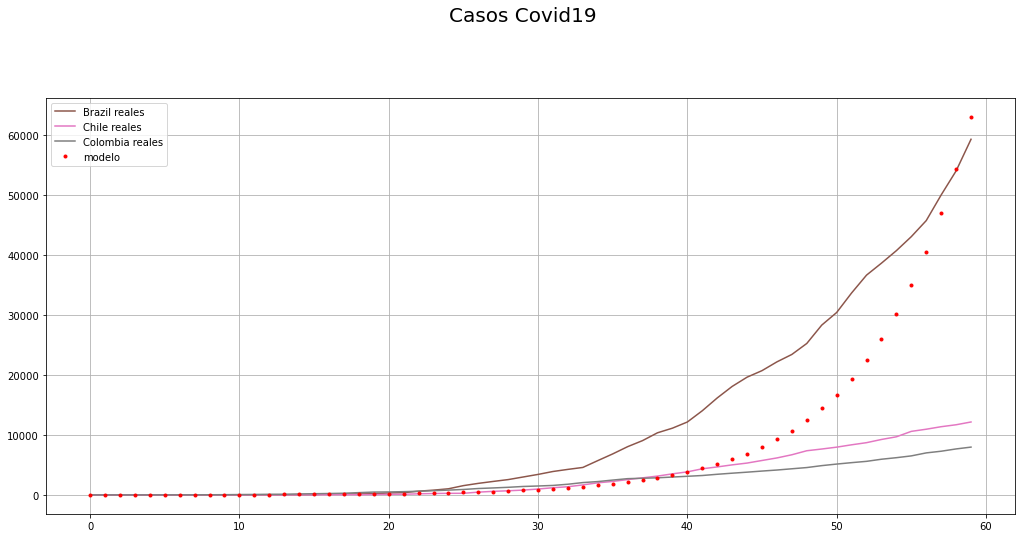

In [634]:
lista_paises = ['Argentina','Brazil','Chile','Colombia']
lista_paises = ['Brazil','Chile','Colombia']
#lista_paises = ['Argentina']

#armamos la figura para el gráfico
#fig, ax = plt.subplots(figsize=(15,6))
fig, axes = plt.subplots(1, figsize=(15, 8))
fig.suptitle('Casos Covid19', fontsize=20)
fig.tight_layout(pad=4.0)


#axes.set_title('Casos Covid19 Simulados {}'.format(x_pais),fontsize=14, loc='center')
#axes.set_xlim([0, 120])
axes.grid()

#color lineas gráfico
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))

for x_pais in lista_paises:
    dias_principio,casos_principio,dias_x,casos_simu,color = predecir2(x_pais,k,t0)
    label_simu=x_pais + " simulados"
    label_real=x_pais + " reales"
    #print(color)
    axes.plot(dias_principio,casos_principio,label=label_real, color=color)
    #plt.xlim([ind_inicio,ind_final])
    #print(lista)
    #print("----dias_principio casos reales------")
    #print(list(dias_principio)) 
    #print("------casos_principio reales-----")
    #print(list(casos_principio.astype(int)))
    
    #### Calculamos el error
    print('Mean Absolute Error:', metrics.mean_absolute_error(casos_principio, casos_simu))  
    print('Mean Squared Error:', metrics.mean_squared_error(casos_principio, casos_simu))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(casos_principio, casos_simu)))
    
    
axes.plot(dias_x,casos_simu,'.',label="modelo", color = 'red')
#axes.plot(dias_x,casos_simu,'.',label=label_simu, color = 'red')
axes.legend()


In [629]:
df = pd.DataFrame({'Actual': np.array(casos_principio).flatten(), 'Predicted': casos_simu.flatten()})
df.head()

,Actual,Predicted
0,1.0,10.432129
1,1.0,12.091139
2,1.0,14.013981
3,1.0,16.242610
4,3.0,18.825655


In [633]:
print('Mean Absolute Error:', metrics.mean_absolute_error(casos_principio, casos_simu))  
print('Mean Squared Error:', metrics.mean_squared_error(casos_principio, casos_simu))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(casos_principio, casos_simu)))

Mean Absolute Error: 5714.351171654631
Mean Squared Error: 176387548.11162695
Root Mean Squared Error: 13281.09739861985
